In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('./04_(문제)_회귀모델_drinking_water.csv', encoding = 'utf-8-sig')
df

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2
...,...,...,...
259,3,4,4
260,3,4,3
261,4,4,4
262,4,4,4


In [9]:
x_df = df.iloc[:,0:2]
y_df = df.iloc[:,2:3]
y_df

,만족도
0,3
1,2
2,4
3,2
4,2
...,...
259,4
260,3
261,4
262,4


In [14]:
from sklearn.model_selection import train_test_split
train_input, test_input , train_target, test_target = train_test_split(x_df,y_df,test_size = 0.25, random_state = 42)

### 선형회귀

In [22]:
# 선형회귀 클래스(모델) 생성하기 
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(train_input,train_target)
print('훈련 = ' , lr.score(train_input,train_target))
print('테스트 = ' , lr.score(test_input,test_target))
print(lr.coef_, lr.intercept_)

## (해석) 과소적합이고 모델의 설명력이 낮으므로 다항회귀모델으로 변경

훈련 =  0.589220642902726
테스트 =  0.5995961077787295
[[0.08329286 0.68737411]] [0.65308096]


### 다항회귀

In [27]:
train_poly = np.column_stack((train_input**2,train_input))
train_poly.shape

(198, 4)

In [28]:
test_poly = np.column_stack((test_input**2,test_input))
test_poly.shape

(66, 4)

In [33]:
# - 객체(모델) 생성
lr = LinearRegression()

# - 훈련모델 생성
lr.fit(train_poly,train_target)
print('훈련 = ' , lr.score(train_poly,train_target))
print('테스트 = ' , lr.score(test_poly,test_target))

## (해석) 과소적합은 해소되었으나 모델의 설명력(결정력)이 여전히 낮으므로 다중회귀 모델으로 변경

훈련 =  0.6218109034223056
테스트 =  0.6013142296656446


### 다중회귀

In [35]:
### 사이킷런 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly = PolynomialFeatures(degree = 5 , include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape , test_poly.shape)

(198, 20) (66, 20)


In [41]:
### 훈련모델이 사용된 조합의 패턴을 가지고 있습니다
poly.get_feature_names_out()

array(['친밀도', '적절성', '친밀도^2', '친밀도 적절성', '적절성^2', '친밀도^3', '친밀도^2 적절성',
       '친밀도 적절성^2', '적절성^3', '친밀도^4', '친밀도^3 적절성', '친밀도^2 적절성^2',
       '친밀도 적절성^3', '적절성^4', '친밀도^5', '친밀도^4 적절성', '친밀도^3 적절성^2',
       '친밀도^2 적절성^3', '친밀도 적절성^4', '적절성^5'], dtype=object)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print('훈련 = ', lr.score(train_poly, train_target))
print('테스트 = ', lr.score(test_poly, test_target))

훈련 =  0.668686596078267
테스트 =  -1.0195702935609878


In [44]:
# (해석) 테스트 결과는 훈련데이터의 설명력이 조금 상승했지만
# 큰 과대적합이 발생했으므로 릿지, 라쏘,릿지모델으로 과대적합을 규제해 주어야 한다

### 릿지, 라쏘

In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly,train_target)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
train_scaled
test_scaled

### 각 데이터는 55개씩...
# 평균 및 표준편차 확인하기
print(ss.mean_,ss.scale_)

[  2.91919192   3.14141414   9.41414141   9.57575758  10.61616162
  32.31313131  32.09090909  33.52525253  37.92929293 116.2020202
 114.18181818 116.26262626 123.66666667 141.76767677 434.73737374
 425.06060606 427.46464646 442.66666667 476.49494949 550.41414141] [  0.94470099   0.86468422   5.2512819    4.95656061   5.39117699
  25.31863468  24.7437742   25.16163644  27.74095631 119.60524125
 117.854504   119.39566561 123.80128261 136.03942004 566.46493889
 560.25815331 564.66090321 578.77571937 604.3252498  660.14808578]


In [58]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print('훈련 : ' , ridge.score(train_scaled,train_target))
print('테스트 : ' , ridge.score(test_scaled,test_target))

훈련 :  0.6428834595890419
테스트 :  0.6342200586076698


In [59]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('훈련 : ', lasso.score(train_scaled, train_target))
print('테스트 : ' ,lasso.score(test_scaled, test_target)) 

훈련 :  0.0
테스트 :  -0.03759780907668264


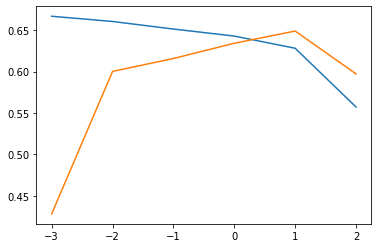

In [60]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1 , 1 , 10 , 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    # 릿지 모델
    ridge = Ridge(alpha = alpha) # alpha는 규제강도라는 속성이다
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
# 그래프로 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## 테스트데이터가 떨어지는 부분이 과소적합
## 훈련데이터가 떨어지는 부분이 과소적합